# Lecture 0.2 Introduction to Functions

When we say a function, we mean some expression where each input determines exactly one output. Typically, inputs are $x$, and outputs are $y$. Functions have to have only one output for each input.

\begin{align*}
y=f(x)
\end{align*}

Any graph can be tested to be a function or not using the vertical line test, making sure it only intersects the graph at one spot, regardless of where we draw it.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def plot_data(x, y, lbl):
    fig, ax = plt.subplots()
    ax.plot(x, y, label=lbl)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.axhline(y=0, color="black")
    ax.axvline(x=0, color="black")
    
    ax.legend()
    return fig, ax

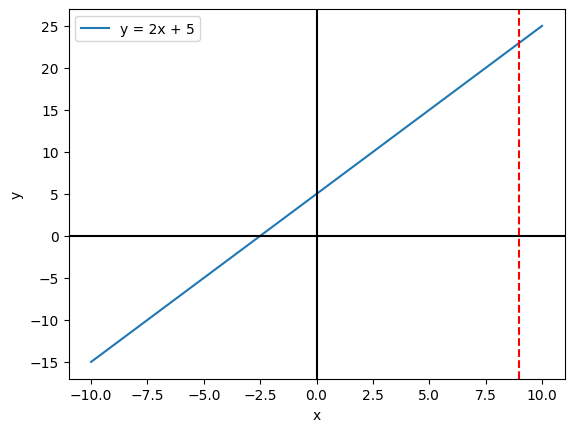

In [3]:
x = np.linspace(-10, 10, 10000)
y = 2 * x + 5

fig, ax = plot_data(x, y, "y = 2x + 5")
ax.axvline(x=random.random()*20-10, color="red", linestyle="--")

## Piece-wise functions

The formula for the function changes depending on the input value $x$. The simplest example is the absolute value function.

$$
| x | = 
\begin{cases}
  x & \text{, if } x \geq 0 \\
  -x & \text{, if } x < 0
\end{cases}
$$

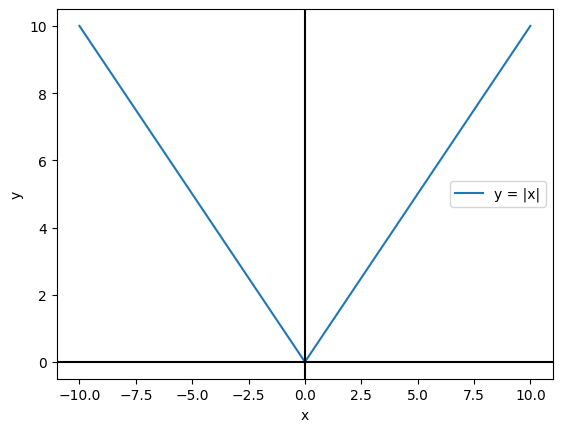

In [4]:
y = np.abs(x)
fig, ax = plot_data(x, y, "y = |x|")

Another more complex example:

$$
f(x) = 
\begin{cases}
0.5 & \text{, if } x \leq -1 \\
\sqrt{1 - x^{2}} & \text{, if } -1 < x < 1 \\
x & \text{, if } x \geq 1
\end{cases}
$$

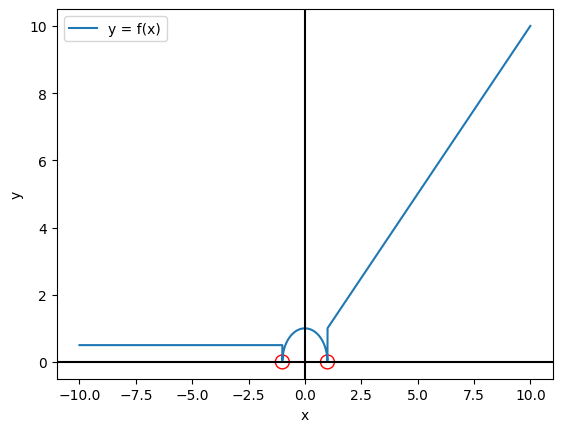

In [5]:
conditions = [x <= -1, (x > -1) & (x < 1), x >= 1]
expressions = [0, np.ma.sqrt(1 - x**2), x]
y = np.zeros_like(x, dtype=float)
excluded_x = [1, -1]
excluded_y = [0, 0]

y[x < -1] = 0.5
y[(x >= -1) & (x < 1)] = np.sqrt(1 - x[(x >= -1) & (x < 1)]**2)
y[x >= 1] = x[x >= 1]
fig, ax = plot_data(x, y, "y = f(x)")
ax.scatter(excluded_x, excluded_y, c='none', edgecolors='red', s=100, marker='o')

## Domain and Range

Domain means all the values that can be inputs to the function.

Range means all the values that can be outputs of the function.

Usually, there are some constraints in the domain. For example, the area of the square:

$$
A = s^{2}
$$

In this case, the side length needs to be greater than or equal to zero.
In another case, let's look at the formulatic restraints:

$$
y = \frac{1}{x}
$$

In this case, we cannot divide by zero, but all other numbers are possible.

$$
f(x) = \sqrt{x}
$$

In this case, the domain is all non-negative numbers, if we are talking about real numbers.

Natural Domain means all the values that "work" with the given function.

Ex:

$$
f(x) = x^{3}
$$

For this function, $x \in \mathbb{R}$ is the Natural Domain.

Ex:

$$
g(x) = \frac{1}{(x-1)(x-3)}
$$

For this function, $x \ne 1$ and $x \ne 3$

Ex:

$$
h(x) = \tan{x}
$$

For this function, $x \ne \frac{\pi}{2} + \pi k$ where $k \in \mathbb{Z}$

Ex:

$$
f(x) = \sqrt{x^{2} - 5x + 6}
$$


Text(2.3, 0.5, '-')

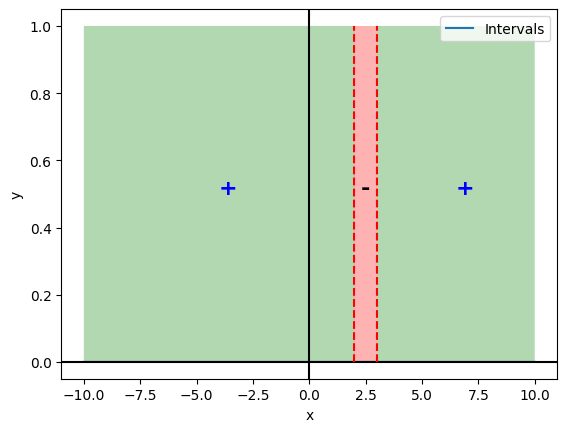

In [6]:
interval1 = np.logical_and(x >= -np.inf, x <= 2)
interval2 = np.logical_and(x >= 3, x <= np.inf)
interval3 = np.logical_and(x > 2, x < 3)

fig, ax = plot_data(x, np.zeros_like(x), "Intervals")

ax.fill_between(x, 0, 1, where=interval1, facecolor="green", alpha=0.3)
ax.fill_between(x, 0, 1, where=interval2, facecolor="green", alpha=0.3)
ax.fill_between(x, 0, 1, where=interval3, facecolor="red", alpha=0.3)

ax.plot([2, 2], [0, 1], color="red", linestyle='--')
ax.plot([3, 3], [0, 1], color="red", linestyle='--')

ax.text(-4, 0.5, "+", fontsize=16, fontweight="bold", color="blue")
ax.text(6.5, 0.5, "+", fontsize=16, fontweight="bold", color="blue")
ax.text(2.3, 0.5, "-", fontsize=16, fontweight="bold", color="black")

This means that the domain will be $x \leq 2$ and $x \geq 3$, or symbolically:

$$
D(x) = (-\inf , 2] \cup [3, \inf )
$$

Ex:

$$
f(x) = \frac{x^2-4}{x-2}
$$

The domain will be $(-\inf , 2) \cup (2, \inf )$

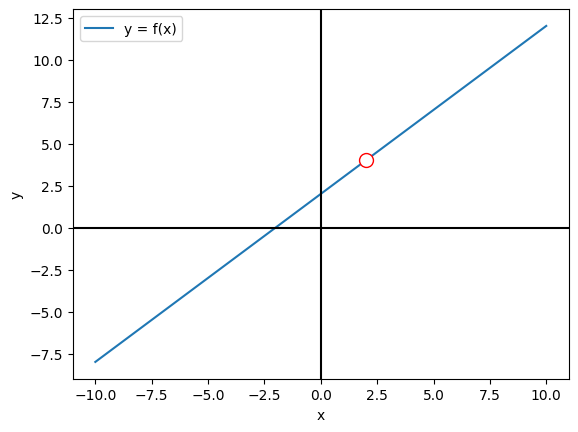

In [7]:
y = x + 2

fig, ax = plot_data(x, y, "y = f(x)")
ax.scatter(2, 4, edgecolors="red", s=100, marker='o', c="white", zorder=3)

This is called a removable discontinuity, and we get a hole. If this is a result of "cancelling out" the fraction, it will give us a hole, but if it is not something we can "cancel out", it ends up being an asymptote.

Ex:

$$
f(x) = \frac{3x}{x - 4}
$$

The domain will be  $(-\inf , 4) \cup (4, \inf )$

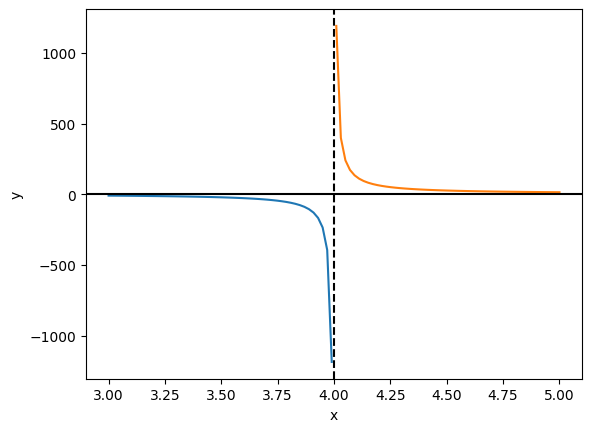

In [8]:
x = np.linspace(3, 5, 100)
y = np.zeros_like(x)
y[x != 4] = 3 * x / (x - 4)
y1 = y[x < 4]
y2 = y[x > 4]

fig, ax = plt.subplots()
ax.plot(x[x < 4], y1)
ax.plot(x[x > 4], y2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axhline(y=0, color="black")
ax.axvline(x=4, color="black", linestyle="--")


## Even and Odd functions

Even functions: Symmetric about the Y axis

$$
f(-x) = f(x)
$$

Odd functions: Symmetric about the Origin

$$
f(-x) = -f(x)
$$